# Persian Classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

## Data exploration


In [4]:
import pathlib
path = Path("SplitData7")

In [5]:
import tarfile
tar = tarfile.open("data/SplitData7Tar.tgz")
tar.extractall()
tar.close()

In [6]:
path.ls()

[PosixPath('SplitData7/.DS_Store'),
 PosixPath('SplitData7/test'),
 PosixPath('SplitData7/._test'),
 PosixPath('SplitData7/._.DS_Store'),
 PosixPath('SplitData7/._train'),
 PosixPath('SplitData7/valid'),
 PosixPath('SplitData7/models'),
 PosixPath('SplitData7/train'),
 PosixPath('SplitData7/._valid')]

In [7]:
tfms = get_transforms(do_flip=False)

In [8]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224,).normalize()

In [9]:
data.batch_stats()

[tensor([-0.0002, -0.0002, -0.0002]), tensor([1., 1., 1.])]

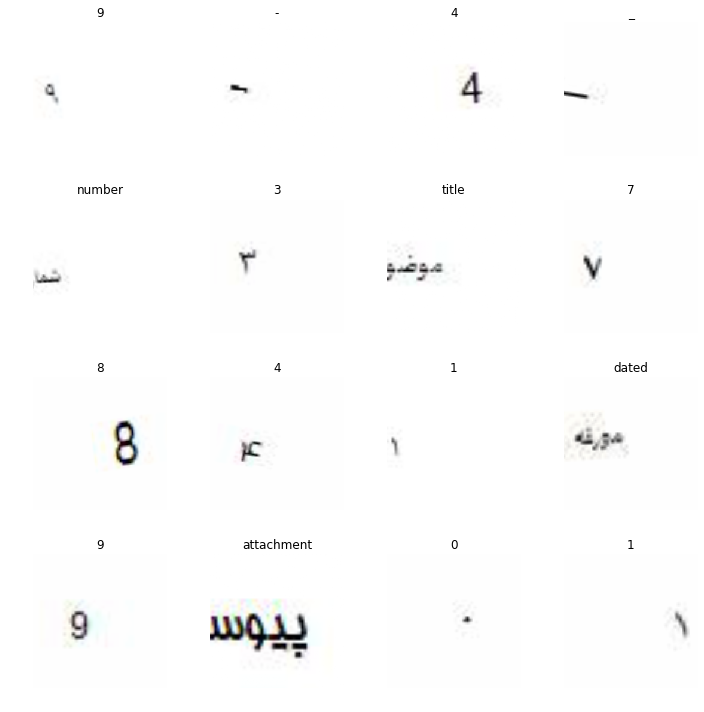

In [10]:
data.show_batch(rows=4, figsize=(10,10))

In [11]:
print(data.classes)
len(data.classes),data.c

['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Date', 'Otherchar', '_', 'attachment', 'dated', 'number', 'title']


(18, 18)

## Resnet 34

#### We will train for 4 epochs ie 4 cycles through all our data.

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.354882,0.619360,0.200914
2,0.655668,0.244712,0.076116
3,0.383952,0.105953,0.032813
4,0.297078,0.090897,0.025282


In [14]:
learn.save('stage-1')

## Results

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


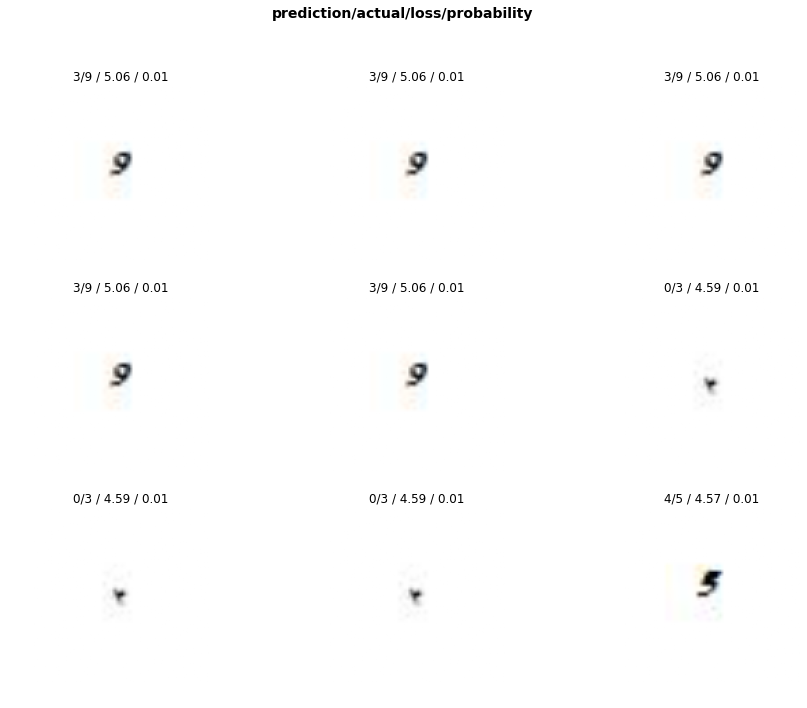

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

In [17]:
doc(interp.plot_top_losses)

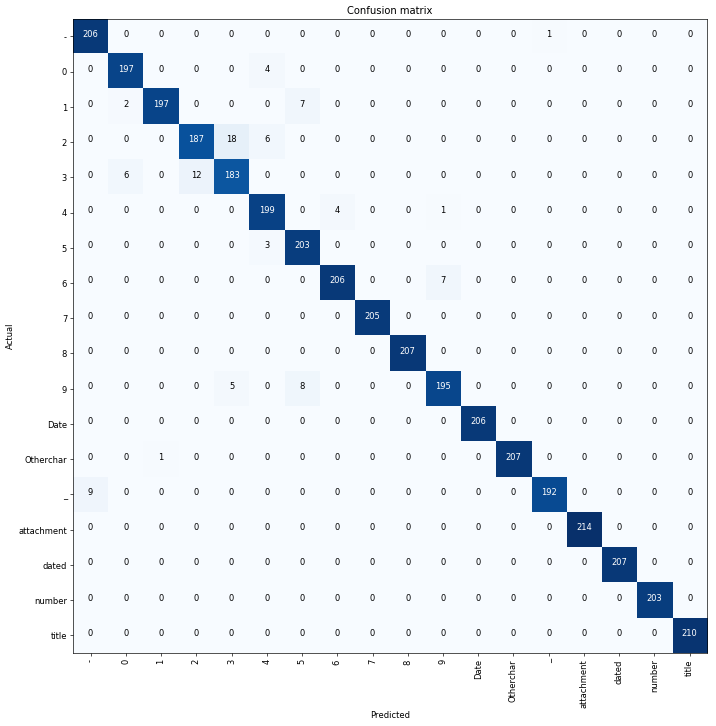

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
interp.most_confused(min_val=2)

[('2', '3', 18),
 ('3', '2', 12),
 ('_', '-', 9),
 ('9', '5', 8),
 ('1', '5', 7),
 ('6', '9', 7),
 ('2', '4', 6),
 ('3', '0', 6),
 ('9', '3', 5),
 ('0', '4', 4),
 ('4', '6', 4),
 ('5', '4', 3)]

## Finetuning and Unfreezing


In [20]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,0.199353,0.090402,0.034965
2,0.135889,0.172604,0.047606
3,0.080019,0.158880,0.038462
4,0.047095,0.009239,0.004572
5,0.032292,0.006659,0.003228


In [22]:
learn.save('stage-34-2')

In [ ]:
learn.load('stage-1');

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


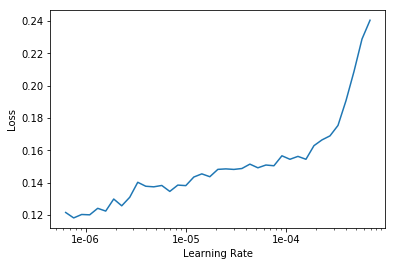

In [27]:
learn.recorder.plot()

In [28]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.147511,0.023580,0.008876
2,0.109596,0.013737,0.005379
3,0.082692,0.014603,0.007531
4,0.065604,0.010105,0.003228
5,0.067824,0.010046,0.003228


In [29]:
learn.load('stage-1');

In [30]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.143642,0.036821,0.014793
2,0.105953,0.030599,0.010221
3,0.071585,0.013625,0.005917
4,0.052615,0.011144,0.006455
5,0.044857,0.008341,0.003228


In [31]:
learn.load('stage-1');

In [32]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.157370,0.055645,0.020979
2,0.112620,0.016552,0.006186
3,0.071357,0.013187,0.005648
4,0.042194,0.006722,0.004841
5,0.028892,0.005923,0.003228


In [33]:
learn.load('stage-1');

In [34]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.128170,0.032906,0.012372
2,0.090137,0.012434,0.003765
3,0.065663,0.008648,0.003228
4,0.047594,0.006792,0.003228
5,0.041172,0.005955,0.003228


## Resnet 50

#### It might be needed to restart the kernel if the notebook is out of memory. If so run until the end of the data exploration from the beginning of the notebook before running this code. Alternatively, just replace the First line of code inorder to specify a lower batch number in this case bs=32 : data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=299, bs=32).normalize()

In [13]:
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,
                                   size=299).normalize()

In [14]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


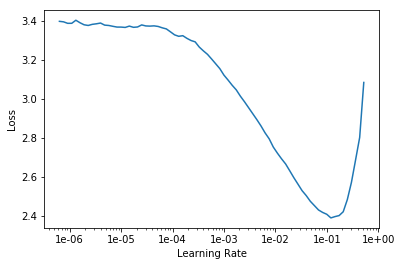

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,1.396531,0.821648,0.290748
2,0.681264,0.362030,0.121302
3,0.321679,0.134769,0.047068
4,0.185383,0.045111,0.018020
5,0.117454,0.020607,0.005110
6,0.091293,0.019298,0.010221
7,0.072667,0.016700,0.006186
8,0.060499,0.011509,0.005110


In [17]:
learn.save('stage-1-50')

In [17]:
learn.load('stage-1-50');

In [18]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.054200,0.013474,0.004841
2,0.046045,0.010398,0.004572
3,0.038174,0.007728,0.004572


In [19]:
learn.load('stage-1-50');

In [20]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,error_rate
1,0.284041,1.144491,0.291555
2,0.077128,0.017355,0.008069
3,0.031069,0.009920,0.003228


In [21]:
learn.load('stage-1-50');

In [22]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-1))

epoch,train_loss,valid_loss,error_rate
1,1.891478,260.065094,0.480635
2,0.663226,0.179438,0.044110
3,0.114611,0.026968,0.009952


In [23]:
learn.load('stage-1-50');

In [24]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate
1,0.362691,0.542728,0.144432
2,0.102549,0.020921,0.006724
3,0.030937,0.010374,0.004303


In [25]:
learn.load('stage-1-50');

In [26]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-1))

epoch,train_loss,valid_loss,error_rate
1,1.945657,219.030380,0.827864
2,0.839811,1.437172,0.089833
3,0.111149,0.020919,0.008069


In [27]:
learn.load('stage-1-50');

In [18]:
learn.unfreeze()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate
1,0.210617,0.314152,0.104895
2,0.060381,0.027693,0.010221
3,0.024746,0.007659,0.002690


In [19]:
learn.save('stage-2-50')

In [30]:
learn.load('stage-2-50');

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

In [32]:
interp.most_confused(min_val=2)

[('_', '-', 12)]